In [1]:
import os
#os.environ["CUDA_VISIBLE_DEVICES"]="1,2" # if you need to specify GPUs
import time
from transformers import AutoTokenizer, AutoModelForCausalLM, TextStreamer
import transformers
import torch

model_id = "tiiuae/falcon-40b-instruct"

tokenizer = AutoTokenizer.from_pretrained(model_id)
streamer = TextStreamer(tokenizer)

model = AutoModelForCausalLM.from_pretrained(
    model_id,
    # --- Choosing between 4, 8, and 16 bit --- #
    # 8bit: ~50GB GPU memory, fastest
    # 4bit: ~25GB GPU memory, slowest 
    # 16bit: ~100GB GPU memory, slow
    load_in_8bit=True, # torch_dtype=torch.bfloat16 or load_in_4bit=True
    trust_remote_code=True,
    device_map="auto",
)

pipeline = transformers.pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
)

2023-07-05 15:33:22.826191: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-07-05 15:33:23.531795: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-07-05 15:33:23.531849: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-07-05 15:33:23.531855: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.



===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /home/h/.local/lib/python3.8/site-packages/bitsandbytes/libbitsandbytes_cuda118.so
CUDA_SETUP: WARNING! libcudart.so not found in any environmental path. Searching in backup paths...
CUDA SETUP: CUDA runtime path found: /usr/local/cuda/lib64/libcudart.so.11.0
CUDA SETUP: Highest compute capability among GPUs detected: 7.5
CUDA SETUP: Detected CUDA version 118
CUDA SETUP: Loading binary /home/h/.local/lib/python3.8/site-packages/bitsandbytes/libbitsandbytes_cuda118.so...


/home/h/.local/lib/python3.8/site-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('unix'), PosixPath('path=/run/user/1000/bus,guid=9e7b6889f82f087d8696128264a33fe9')}
  warn(msg)
/home/h/.local/lib/python3.8/site-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/usr/share/gconf/ubuntu.default.path')}
  warn(msg)
/home/h/.local/lib/python3.8/site-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('1'), PosixPath('0')}
  warn(msg)
/home/h/.local/lib/python3.8/site-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/usr/share/gconf/ubuntu.mandatory.path')}
  warn(msg)
/

# Prompt the model:

Q&A example

In [2]:
prompt = """Q: Why is the sky blue?
A: """


start = time.time()
sequences = pipeline(
    prompt,
    max_length=256,
    do_sample=True,
    top_k=10,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id,
    streamer=streamer
)

#for seq in sequences:
#    print(f"Result: {seq['generated_text']}")
print(f"Time: {time.time() - start}")


/home/h/.local/lib/python3.8/site-packages/transformers/generation/utils.py:1259: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


Q: Why is the sky blue?
A: “The sky is blue because when sunlight passes through the atmosphere, it gets scattered in all directions. Blue light is scattered more than other colors of light, which is why we see the sky as blue during the day. At night, when the sun is below the horizon, the sky appears dark because there is no blue light to be scattered and reflected.”<|endoftext|>
Time: 19.11681342124939


Code continuation example:

In [3]:
prompt = """import matplotlib.pyplot as plt
"""


start = time.time()
sequences = pipeline(
    prompt,
    max_length=256,
    do_sample=True,
    top_k=10,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id,
    streamer=streamer
)

#for seq in sequences:
#    print(f"Result: {seq['generated_text']}")
print(f"Time: {time.time() - start}")

Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


import matplotlib.pyplot as plt
import numpy as np

# Generate some data
x = np.arange(100)
y = np.sin(x / 10)

# Plot a single line
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, color='black')

# Add the same plot to a new subplot
ax_second = fig.add_subplot(122)
ax_second.plot(x, y, color='black')

# Set the position of the second subplot
fig.position = (1, 1)

# Add a new axis
ax_third = fig.add_subplot(333)
ax_third.plot(np.random.rand(100)*2-1, color='blue')

# Show the plot
plt.show()
</code></pre>

In this example, we create a 3x2 subplot using the <code>subplot</code> function. We then create the first subplot and plot the data onto it. We then create a new
Time: 72.6674816608429


Testing the generated code:

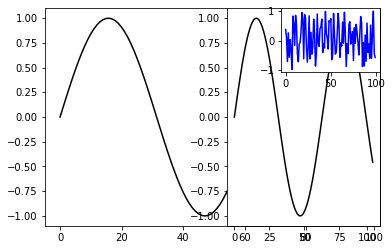

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some data
x = np.arange(100)
y = np.sin(x / 10)

# Plot a single line
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, color='black')

# Add the same plot to a new subplot
ax_second = fig.add_subplot(122)
ax_second.plot(x, y, color='black')

# Set the position of the second subplot
fig.position = (1, 1)

# Add a new axis
ax_third = fig.add_subplot(333)
ax_third.plot(np.random.rand(100)*2-1, color='blue')

# Show the plot
plt.show()